In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep=";")
for e in range(0,len(df['Date'])):
    df.iloc[e,0] = datetime.strptime(df.iloc[e,0]+" "+df.iloc[e,1], '%d/%m/%Y %H.%M.%S')
for e in range(2,len(df.columns)-2):
    for i in range(0,df.shape[0]):
        df.iloc[i,e]=float(str(df.iloc[i,e]).replace(",","."))

In [3]:
df = df.drop(labels=['Time','Unnamed: 15','Unnamed: 16'], axis=1)

In [4]:
df.drop(df[df['CO(GT)'] < 0].index, inplace = True)

In [5]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000,7674.000000
mean,1054.222700,-150.867735,897.865911,230.809747,782.760099,97.746286,1374.024498,990.038963
std,341.261735,152.553382,348.728250,233.316418,326.251230,85.341664,478.335306,470.166864
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,927.000000,-200.000000,716.000000,90.000000,628.000000,73.000000,1157.000000,704.000000
50%,1062.000000,-200.000000,903.000000,177.000000,782.000000,107.000000,1425.000000,968.000000
75%,1235.000000,-200.000000,1116.750000,326.000000,949.000000,141.000000,1659.000000,1287.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [6]:
df.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [7]:
df.shape

(7674, 14)

In [8]:
sns.set()

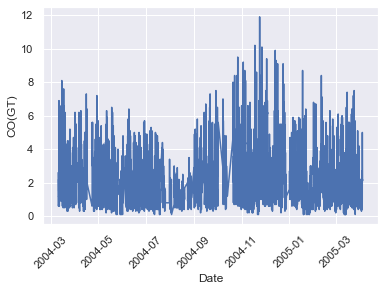

In [9]:
plt.ylabel('CO(GT)')
plt.rcParams["figure.figsize"] = (30,10)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df['Date'], df['CO(GT)'], )
plt.show()

In [10]:
splitPoint = int(df.shape[0]*0.80)
train = df[df.index <= splitPoint].loc[:,'CO(GT)']
test = df[df.index > splitPoint].loc[:,'CO(GT)']

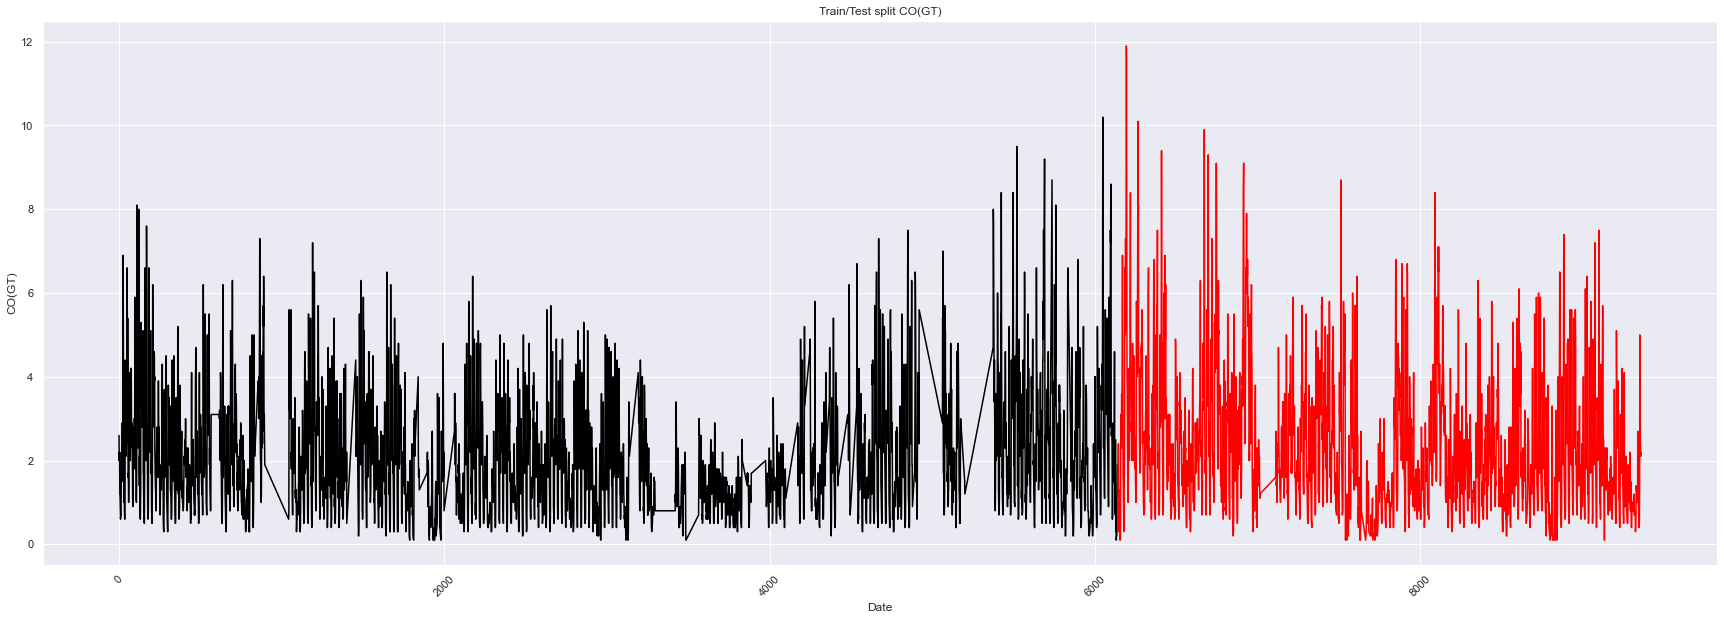

In [11]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
    
plt.ylabel('CO(GT)')
plt.xlabel('Date')
    
plt.xticks(rotation=45)
plt.title("Train/Test split CO(GT)")
plt.show()

C:\Python\Python3.10.4\lib\site-packages\statsmodels\tsa\ar_model.py:233: FutureWarning: old_names will be removed after the 0.14 release. You should stop setting this parameter and use the new names.
  warnings.warn(


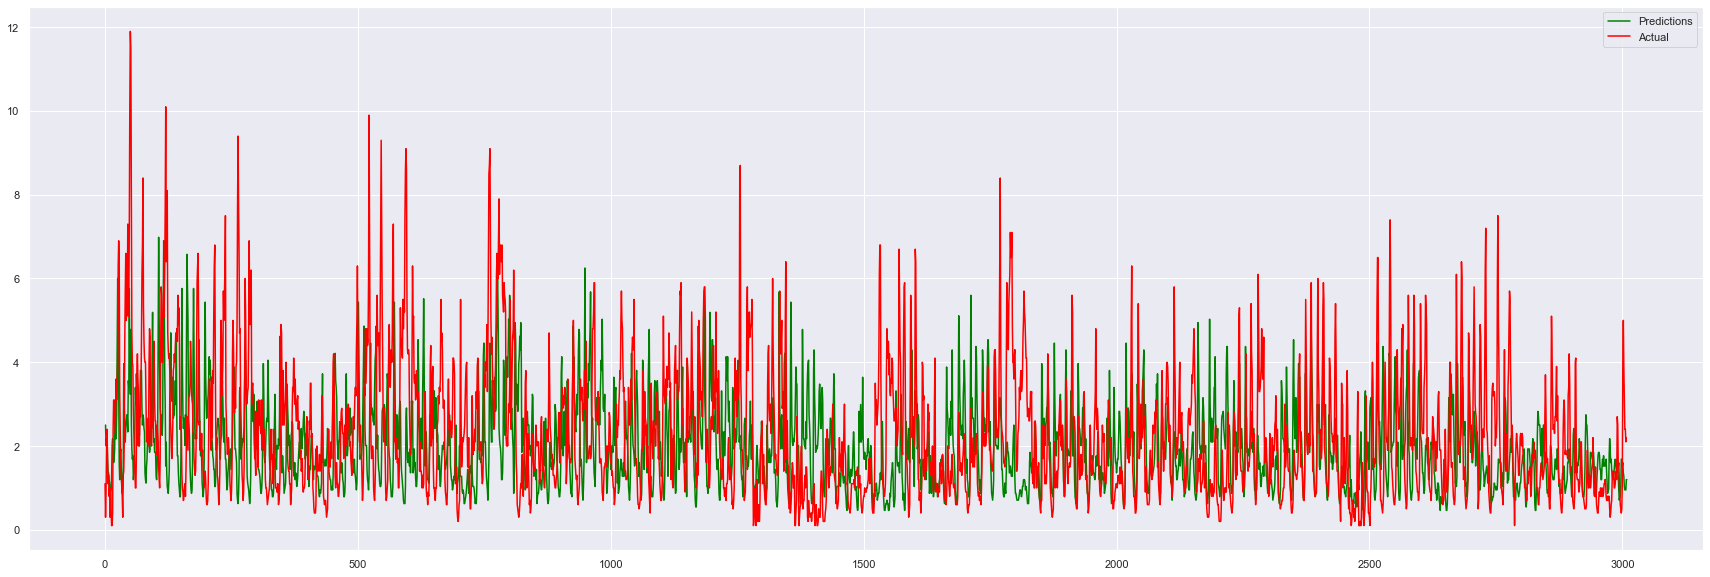

MAE: nan


In [12]:
allResults= []
from statsmodels.tsa.ar_model import AutoReg
resAutoReg = []

currentdf = train
data = currentdf

model = AutoReg(np.asarray(data), lags=1, old_names=True)
model_fit = model.fit()
yhat = model_fit.predict(0, len(test))
plt.plot(yhat, color='green', label = 'Predictions')
plt.plot(test.to_list(), color='red', label = 'Actual')
plt.legend()
plt.show()
s = 0
for j in range(0,len(yhat)):
    s+=abs(yhat[j]-test.to_list()[j-1])
print("MAE:",s/len(yhat))
resAutoReg.append(s/len(yhat))
allResults.append(resAutoReg)

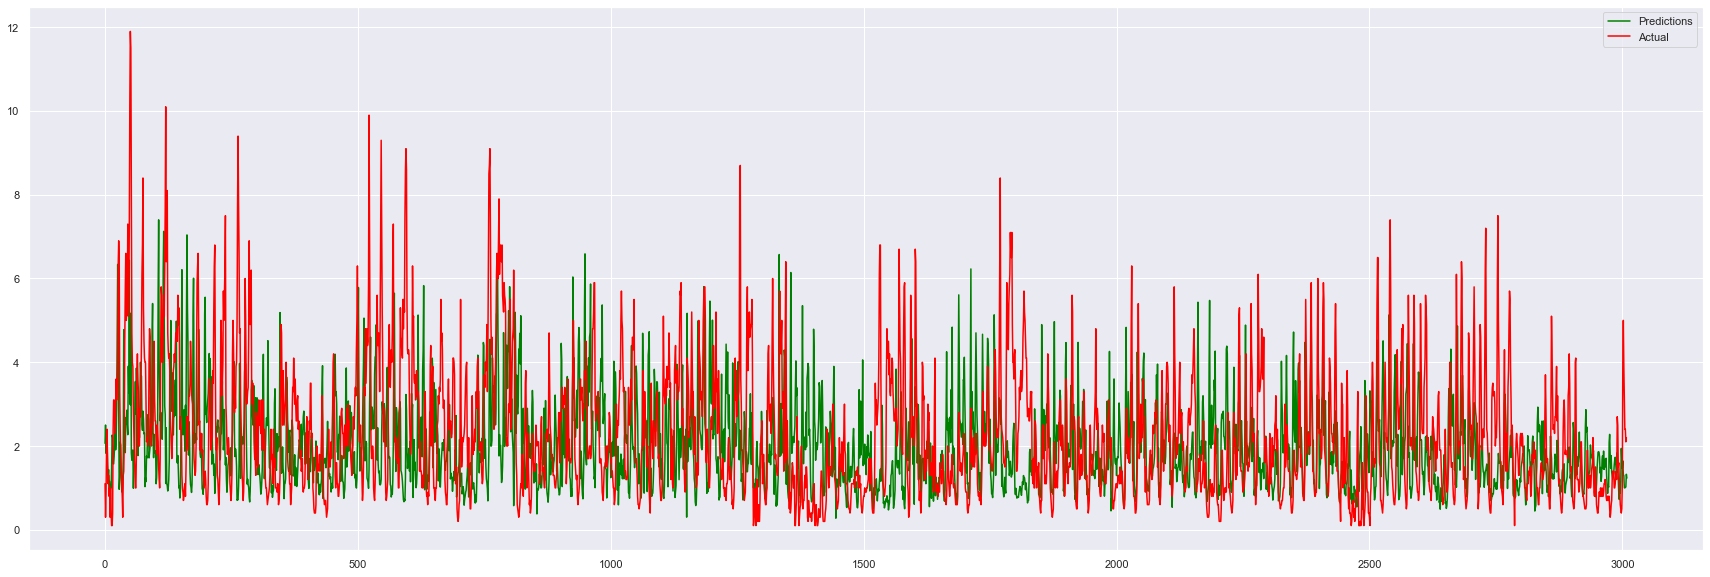

MAE: 1.311820744260426


In [13]:

resARIMA = []
from statsmodels.tsa.arima.model import ARIMA

currentdf = train
data = currentdf
model = ARIMA(np.asarray(data.fillna(0)), order=(5, 0, 1))
model_fit = model.fit()
yhat = model_fit.predict(0, len(test))
plt.plot(yhat, color='green', label = 'Predictions')
plt.plot(test.to_list(), color='red', label = 'Actual')
plt.legend()
plt.show()
s = 0
for j in range(0,min(len(yhat),len(test.to_list()))):
    s+=abs(yhat[j]-test.to_list()[j])
print("MAE:",s/len(yhat))
resARIMA.append(s/len(yhat))
allResults.append(resARIMA)

C:\Python\Python3.10.4\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


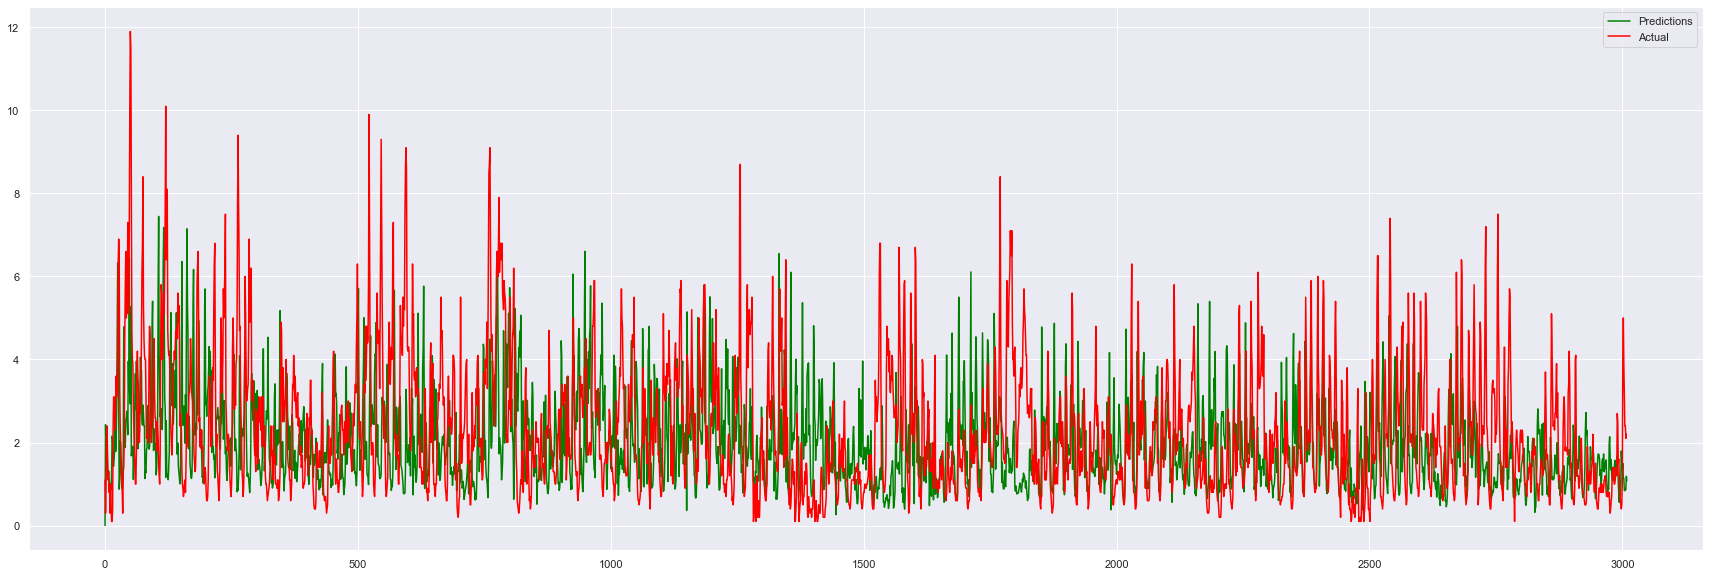

MAE: 1.3012222437609997


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
resSARIMAX = []
currentdf = train
data = currentdf

model = SARIMAX(np.asarray(data.fillna(0)), order=(5, 0, 1), seasonal_order=(0,0,0,0))
model_fit = model.fit()
yhat = model_fit.predict(0, len(test))
plt.plot(yhat, color='green', label = 'Predictions')
plt.plot(test.to_list(), color='red', label = 'Actual')
plt.legend()
plt.show()
s = 0
for j in range(0,min(len(yhat),len(test.to_list()))):
    s+=abs(yhat[j]-test.to_list()[j])
print("MAE:",s/len(yhat))
resSARIMAX.append(s/len(yhat))
allResults.append(resSARIMAX)

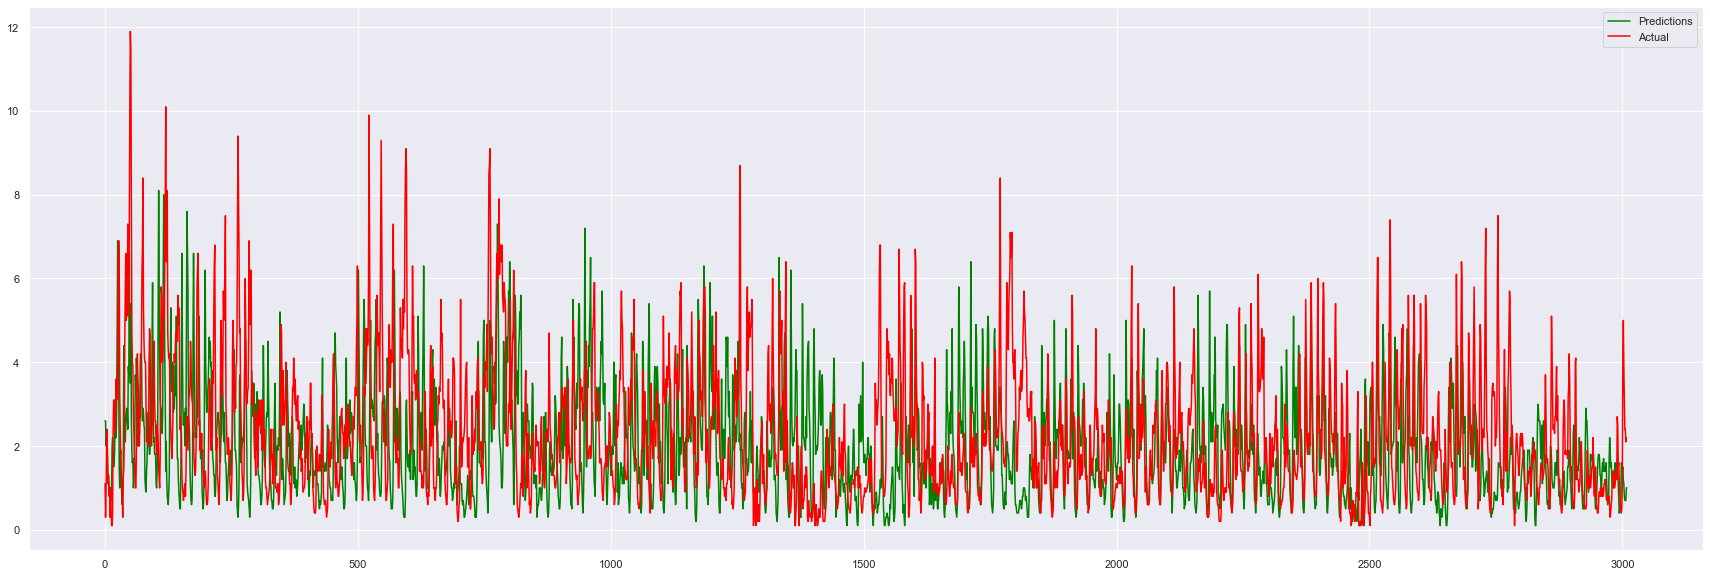

MAE: 1.37910298821909


In [15]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
resSimpleExpSmoothing = []
currentdf = train
data = currentdf

model = SimpleExpSmoothing(np.asarray(data.fillna(0)))
model_fit = model.fit()
yhat = model_fit.predict(0, len(test))
plt.plot(yhat, color='green', label = 'Predictions')
plt.plot(test.to_list(), color='red', label = 'Actual')
plt.legend()
plt.show()
s = 0
for j in range(0,min(len(yhat),len(test.to_list()))):
    s+=abs(yhat[j]-test.to_list()[j])
print("MAE:",s/len(yhat))
resSimpleExpSmoothing.append(s/len(yhat))
allResults.append(resSimpleExpSmoothing)

In [16]:
resultsDf = pd.DataFrame(allResults, columns=['CO'])
resultsDf

,CO
0,NaN
1,1.311821
2,1.301222
3,1.379103


<AxesSubplot:>

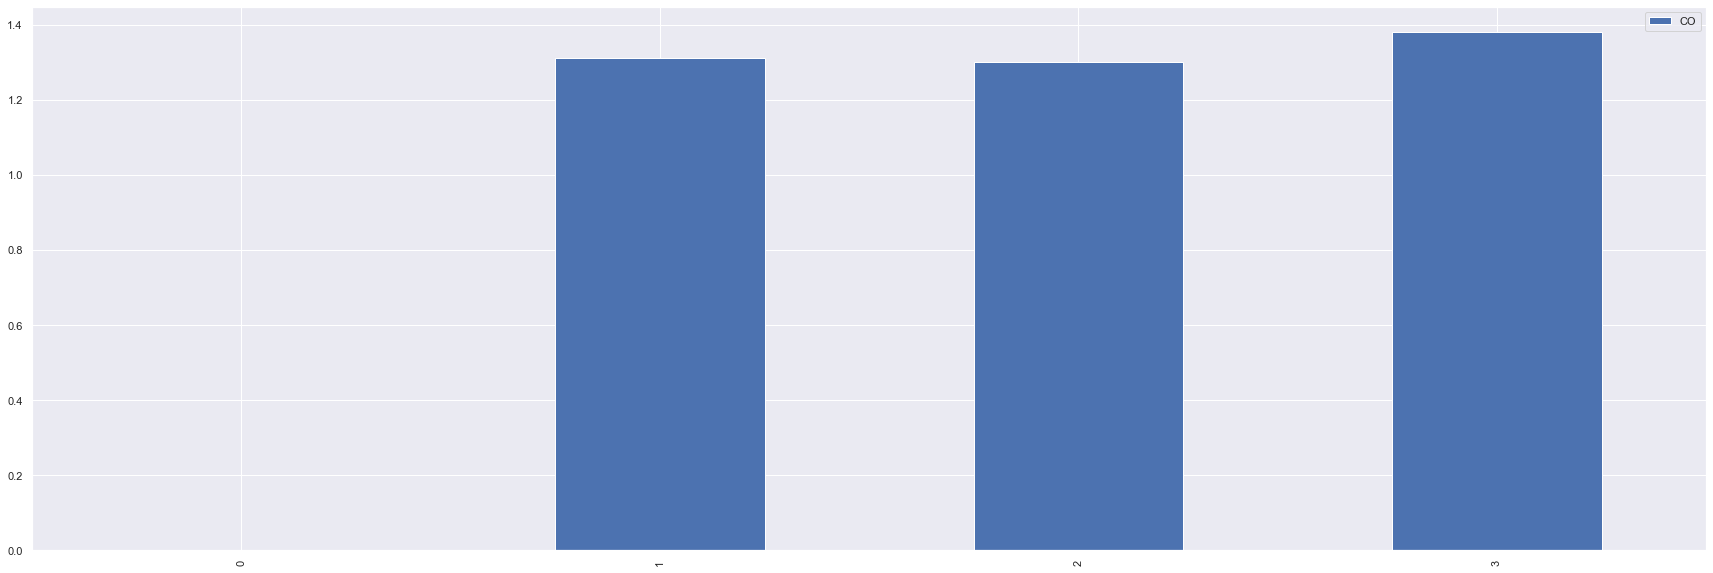

In [17]:
resultsDf.plot.bar()

In [18]:
df['Month'] = 0
df['Season'] = 0
df['CO_Category'] = 0
df['DaySeason'] = 0

In [19]:
df

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Season,CO_Category,DaySeason
0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,0,0,0,0
1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,0,0,0,0
2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,0,0,0,0
3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,0,0,0,0
4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,0,0,0,0
9353,2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,0,0,0,0
9354,2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,0,0,0,0
9355,2005-04-04 13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,0,0,0,0


In [20]:
df.reset_index(inplace=True)
for e in range(0,df.shape[0]):
    df.loc[e,'Month'] = df.loc[e,'Date'].month
    df.loc[e,'Hour'] = df.loc[e,'Date'].hour
    if df.loc[e,'Month'] in [12,1,2]:
        df.loc[e,'Season'] = '0'
    elif df.loc[e,'Month'] in [3,4,5]:
        df.loc[e,'Season'] = '1'
    elif df.loc[e,'Month'] in [6,7,8]:
        df.loc[e,'Season'] = '2'
    else:
        df.loc[e,'Season'] = '3'
    if df.loc[e,'Hour'] in [9,10,11,12,13,14]:
        df.loc[e,'DaySeason'] = '0'
    elif df.loc[e,'Hour'] in [15,16,17, 6, 7, 8]:
        df.loc[e,'DaySeason'] = '1'
    elif df.loc[e,'Hour'] in [18,19,20,21]:
        df.loc[e,'DaySeason'] = '2'
    else:
        df.loc[e,'DaySeason'] = '3'
        
    if df.loc[e,'CO(GT)'] < 2:
        df.loc[e,'CO_Category'] = '0'
    elif df.loc[e,'CO(GT)'] < 7:
        df.loc[e,'CO_Category'] = '1'
    else: 
        df.loc[e,'CO_Category'] = '2'

In [21]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
df

,index,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Season,CO_Category,DaySeason,Hour
0,0,2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,3,1,1,2,18.0
1,1,2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,3,1,1,2,19.0
2,2,2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,3,1,1,2,20.0
3,3,2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,3,1,1,2,21.0
4,4,2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,3,1,0,3,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,9352,2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,4,1,1,0,10.0
7670,9353,2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,4,1,1,0,11.0
7671,9354,2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,4,1,1,0,12.0
7672,9355,2005-04-04 13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,4,1,1,0,13.0


In [23]:
from sklearn.preprocessing import MinMaxScaler
dfC = df.loc[:,['T','RH','AH','Month','Hour']]
dfL = df.loc[:,'CO(GT)']
scaler = MinMaxScaler()
# transform data
dfC = scaler.fit_transform(dfC)             

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dfC, dfL, test_size=0.25,random_state=49) 

In [25]:
#Create a Linear Regression model
model = LinearRegression()
# Train the model using the training sets
model.fit(X_train,y_train)
from sklearn import metrics
#Predict Output
y_pred= model.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2:",r2_score(y_test, y_pred))

MSE: 1.563910675333095
R2: 0.1687583474814982


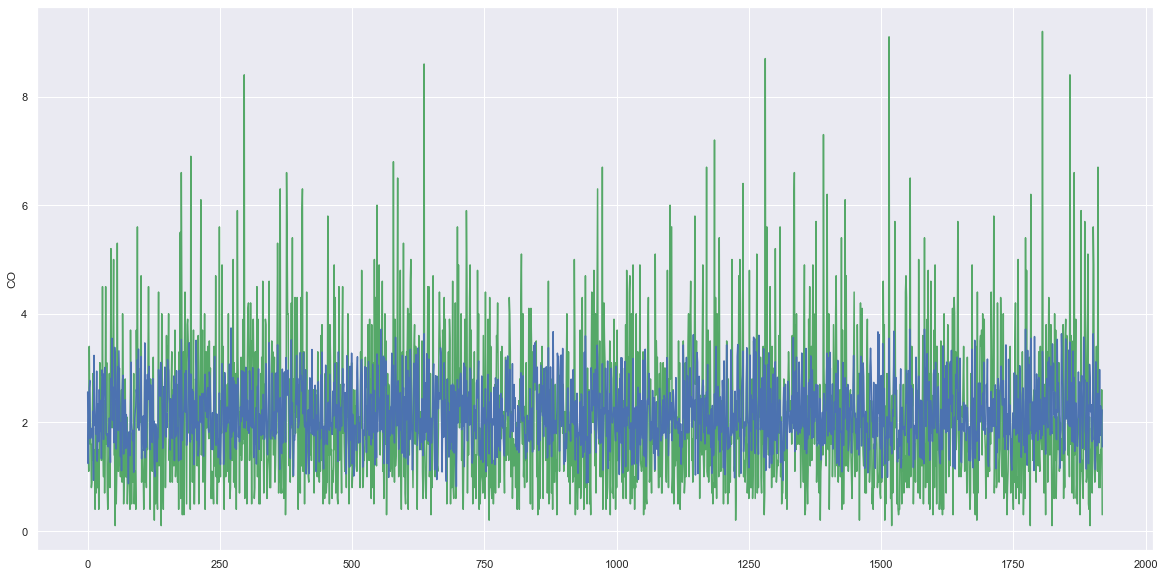

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
_X = [range(0,len(y_pred),1)]
_X = np.ravel(_X)
plt.plot(_X,y_test, color='g', label='Actual')
plt.plot(_X,y_pred,color='b', label='Prediction')

plt.ylabel('CO')
plt.show()

MSE: 1.3736148401421344
R2: 0.2699033981589173


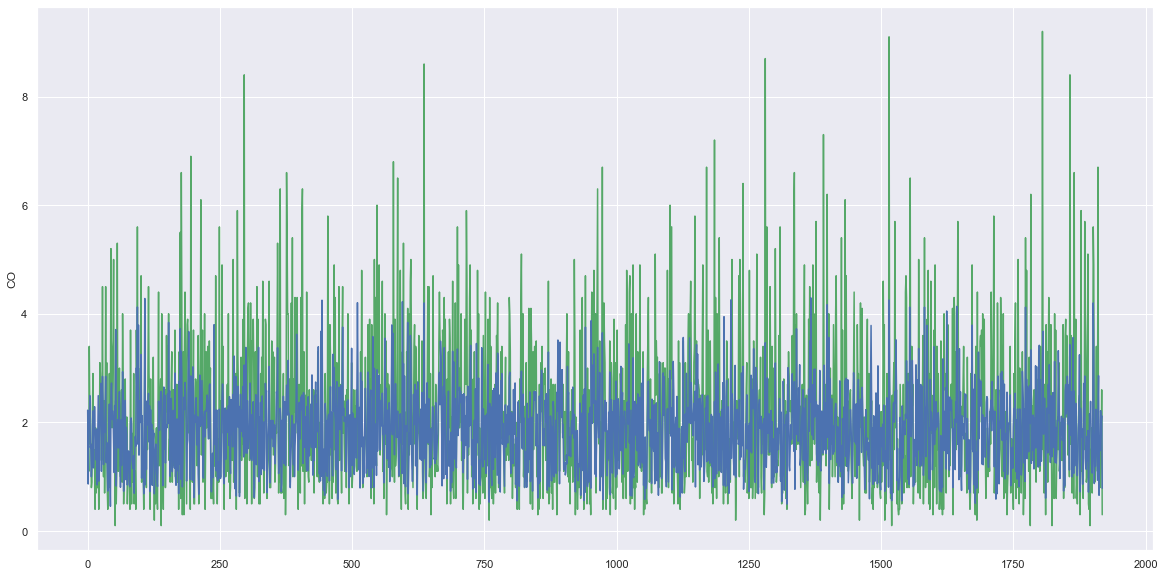

In [27]:
mlp = svm.SVR()
mlp.fit(X_train,y_train)
from sklearn import metrics
#Predict Output
y_pred= mlp.predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2:",r2_score(y_test, y_pred))
plt.rcParams["figure.figsize"] = (20,10)
_X = [range(0,len(y_pred),1)]
_X = np.ravel(_X)
plt.plot(_X,y_test, color='g', label='Actual')
plt.plot(_X,y_pred,color='b', label='Prediction')

plt.ylabel('CO')
plt.show()


In [28]:
from sklearn.utils import resample
df1 = df.copy()
df1_2 = df1.loc[df1['CO_Category']=='2',:]
df1_2
df1_2_ = resample(df1_2,replace=True, n_samples=2000)
df1 = pd.concat([df1,df1_2_])

dfC1 = df1.loc[:,['T','RH','AH','Season','DaySeason']]
dfL1 = df1.loc[:,'CO_Category']            

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dfC1, dfL1, test_size=0.25,random_state=44) 

Accuracy: 0.7651922281934683
Confusion matrix : 
 [[0.7704918  0.22082932 0.00867888]
 [0.35005701 0.62371722 0.02622577]
 [0.         0.         1.        ]]


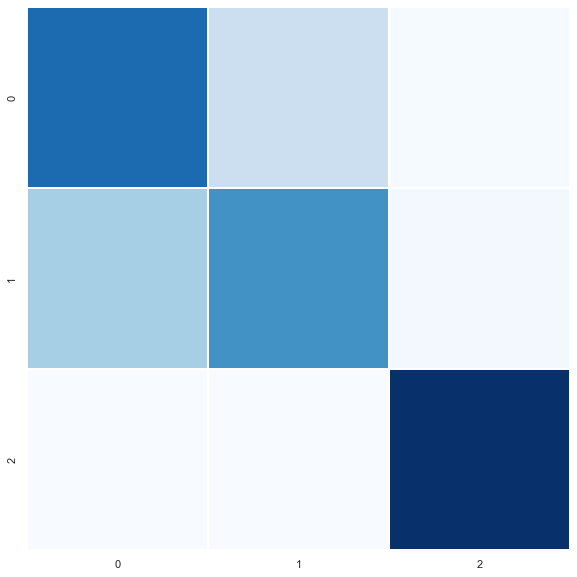

In [30]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=3)
# Εκπαίδευση
model.fit(X_train,y_train)
from sklearn import metrics
# Αξιολόγηση
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# confusion matrix
matrix = confusion_matrix(y_test,y_pred, labels=['0','1','2'], normalize="true")
print('Confusion matrix : \n',matrix)
sns.set()
ax = sns.heatmap(matrix,cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

Accuracy: 0.729226953286482
Confusion matrix : 
 [[0.70298939 0.28929605 0.00771456]
 [0.36944128 0.60433295 0.02622577]
 [0.         0.         1.        ]]


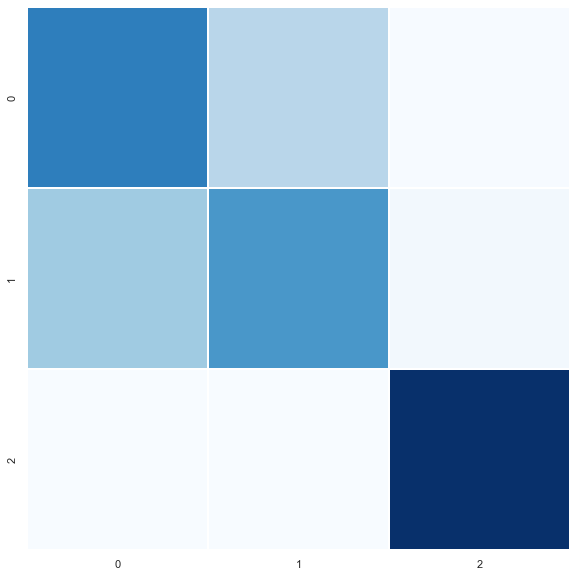

In [31]:
from sklearn.tree import DecisionTreeClassifier
mlp = DecisionTreeClassifier(criterion="entropy", splitter="best",random_state=1)
mlp.fit(X_train,y_train)
from sklearn import metrics
#Predict Output
y_pred= mlp.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
matrix = confusion_matrix(y_test,y_pred, labels=['0','1','2'], normalize="true")
print('Confusion matrix : \n',matrix)
sns.set()
ax = sns.heatmap(matrix,cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()